In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import warnings;   warnings.filterwarnings("ignore")

In [ ]:
path = './drive/MyDrive/PAD/'

Zadanie 1

In [ ]:
import pandas as pd
import numpy as np


path = './drive/MyDrive/PAD/'
df = pd.read_csv(f"{path}/wyniki.csv",engine='python', error_bad_lines=False)
df


,plec,ocena_koncowa
0,F,6
1,F,6
2,F,10
3,F,15
4,F,10
...,...,...
352,M,9
353,M,16
354,M,7
355,M,10


In [ ]:
significanceLevel = 0.05

print("All ocena_koncowa std:",df["ocena_koncowa"].std())
print("All ocena_koncowa mean:",df["ocena_koncowa"].mean())

mask = (df['plec'] == 'M')
df2 = df.loc[mask]

print("Male ocena_koncowa std:",df2["ocena_koncowa"].std())
print("Male ocena_koncowa mean:",df2["ocena_koncowa"].mean())

mask = (df['plec'] == 'F')
df3 = df.loc[mask]

print("Female ocena_koncowa std:",df3["ocena_koncowa"].std())
print("Female ocena_koncowa mean:",df3["ocena_koncowa"].mean())

x1 = df3["ocena_koncowa"].mean()
x2 = df2["ocena_koncowa"].mean()

std1=df2["ocena_koncowa"].std()
std2=df3["ocena_koncowa"].std()
summary = (x1-x2)/(std1 + std2)
if abs(summary) > significanceLevel:
  print("Hipoteza zerowa odrzucona")

All ocena_koncowa std: 3.227796940207425
All ocena_koncowa mean: 11.523809523809524
Male ocena_koncowa std: 3.2587483861862734
Male ocena_koncowa mean: 11.866279069767442
Female ocena_koncowa std: 3.174451848089712
Female ocena_koncowa mean: 11.205405405405406
Hipoteza zerowa odrzucona


Zadanie 2

                                 OLS Regression Results                                
Dep. Variable:                   Zysk   R-squared (uncentered):                   0.814
Model:                            OLS   Adj. R-squared (uncentered):              0.813
Method:                 Least Squares   F-statistic:                              870.1
Date:                Sun, 15 Jan 2023   Prob (F-statistic):                    1.39e-74
Time:                        16:52:48   Log-Likelihood:                         -1522.0
No. Observations:                 200   AIC:                                      3046.
Df Residuals:                     199   BIC:                                      3049.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

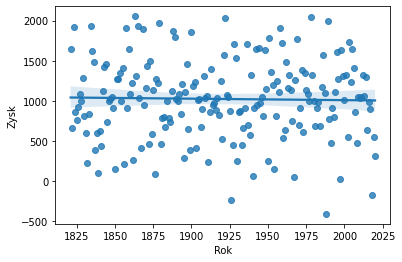

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
df4 = pd.read_csv(f"{path}/ZyskiFirmyX.csv",engine='python', error_bad_lines=False)
df4
X = df4[['Rok']]
Y = df4[['Zysk']]

X=X.astype(float)
Y=Y.astype(float)
model = sm.OLS(Y,X).fit()
print(model.summary())

sns.regplot('Rok', 'Zysk', data=df4)

plt.show()

Jak widzimy trend jest stały.

Zadanie 3

In [ ]:
import plotly.express as px


df5 = pd.read_csv(f"{path}/spendingscores.csv",engine='python', error_bad_lines=False)
df5 = pd.get_dummies(df5, columns=['Gender'], drop_first=True)
print(df5)
X2 = df5[['SpendingScore']]
Y2 = df5[['AnnualIncome','Age','Gender_Male']]

model2 = sm.OLS(X2,Y2).fit()
print(model2.summary())



df5grouped = df5.drop('SpendingScore',axis=1)
df5grouped = df5grouped.drop('Gender_Male', axis=1)
df5grouped = df5grouped.groupby(['Age']).sum()
fig = px.imshow(df5grouped)
fig.show()


df6grouped = df5.drop('Age',axis=1)
df6grouped = df6grouped.drop('Gender_Male', axis=1)
df6grouped = df6grouped.groupby(['SpendingScore']).sum()
fig = px.imshow(df6grouped)
fig.show()

     Age  AnnualIncome  SpendingScore  Gender_Male
0     19            15             39            1
1     21            15             81            1
2     20            16              6            0
3     23            16             77            0
4     31            17             40            0
..   ...           ...            ...          ...
195   35           120             79            0
196   45           126             28            0
197   32           126             74            1
198   32           137             18            1
199   30           137             83            1

[200 rows x 4 columns]
                                 OLS Regression Results                                
Dep. Variable:          SpendingScore   R-squared (uncentered):                   0.697
Model:                            OLS   Adj. R-squared (uncentered):              0.692
Method:                 Least Squares   F-statistic:                              150.9
Date:       